
 ## Loan Status Dataset
In this Dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.

The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous
Credit History, Co-applicant Income, etc…


About the loan_data.csv file:

 * Loan_ID: A unique loan ID.
 * Gender: Either male or female.
 * Married: Weather Married(yes) or Not Marttied(No).
 * Dependents: Number of persons depending on the client.
 * Education: Applicant Education(Graduate or Undergraduate).
 * Self_Employed: Self-employed (Yes/No).
 * ApplicantIncome: Applicant income.
 * CoapplicantIncome: Co-applicant income.
 * LoanAmount: Loan amount in thousands.
 * Loan_Amount_Term: Terms of the loan in months.
 * Credit_History: Credit history meets guidelines.
 * Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
 * Loan_Status: Loan approved (Y/N).

https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction

In [3]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import t
from scipy import stats
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy

print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Scipy version: ", scipy.__version__)

Numpy version:  2.2.2
Pandas version:  2.2.3
Scipy version:  1.15.1


In [4]:
# !wget https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/refs/heads/main/datasets/loan_data.csv
loans = pd.read_csv("https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/refs/heads/main/datasets/loan_data.csv")

loans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


# You should use standard alpha Level for all tests, $$\alpha =0.05$$

## Task 1: Testing if the Mean Applicant Income is Less to a Specific Value

**Objective**: Determine if the mean ApplicantIncome is significantly less than $5,000.

**Parameter**: ApplicantIncome (continuous variable).

Write down what is the Hypothesis for this test, and follow the **5-Steps** for this test.


In [ ]:
The mean ApplicantIncome is greater than or equal to $5,000


In [14]:
loan_applicants_np = np.array(loans["ApplicantIncome"].dropna())

results = stats.ttest_1samp(loan_applicants_np, 5000, alternative="greater")

print("T-Statistic:", results.statistic)
print("P-Value:", results.pvalue)

T-Statistic: -19.52390978651093
P-Value: 1.0


Since p-value (1.0) > α (0.05), we fail to reject the null hypothesis.


## Task 2: Testing if the Mean Loan Amount is Equal to a Specific Value

**Objective**: Determine if the mean LoanAmount is significantly different from a specific value (e.g., $150,000).

**Parameter**: LoanAmount (continuous variable).

Write down what is the Hypothesis for this test.



In [25]:
#The mean LoanAmount is equal to $150,000.

loan_amounts_np = np.array(loans["LoanAmount"].dropna())

results = stats.ttest_1samp(loan_amounts_np, 150000, alternative="two-sided")

print("T-Statistic:", results.statistic)
print("P-Value:", results.pvalue)

#Since p-value (0.0) < α (0.05), we fail to reject the null hypothesis.

T-Statistic: -103173.21740307685
P-Value: 0.0



## Task 3. Testing if the Mean Coapplicant Income is Equal to a Specific Value
**Objective**: Determine if the mean CoapplicantIncome is significantly different from a specific value (e.g., $2,000).

**Parameter**: CoapplicantIncome (continuous variable).


In [28]:
#The mean CoapplicantIncome is equal to $2,000.

coapplicant_income_np = np.array(loans["CoapplicantIncome"].dropna())

results = stats.ttest_1samp(coapplicant_income_np, 2000)

print("T-Statistic:", results.statistic)
print("P-Value:", results.pvalue)

#Since p-value (effectively 1) > α (0.05), we reject the null hypothesis.

T-Statistic: -6.026534782830277
P-Value: 3.9637504997059595e-09



## Task  4. Testing if the Mean Loan Amount Term is Equal to a Specific Value
**Objective**: Determine if the mean Loan_Amount_Term is significantly different from a specific value (e.g., 360 months).

**Parameter**: Loan_Amount_Term (continuous variable).



In [61]:
#The mean Loan_Amount_Term is equal to 360 months.

loan_amount_term_np = np.array(loans["Loan_Amount_Term"].dropna())

results = stats.ttest_1samp(loan_amount_term_np, 360)

print("T-Statistic:", results.statistic)
print("P-Value:", results.pvalue)

#Since the p-value (1.40-7) < α (0.05), we reject the null hypothesis.

T-Statistic: -5.369448022734259
P-Value: 1.4000800135407544e-07


## Task 5. Comparing Applicant Income by Gender

**Task Description:**

**Objective**: Determine if there is a significant difference in the mean income of male and female loan applicants.



**Null Hypothesis (H₀):** There is no significant difference in the mean income between Males and Femails.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean income bbetween Males and Femails.

**Attribute to Use:** income (continuous) and Gender (between Males and Femails).

**Steps:**

Split the dataset into two groups based on Gender (Male and Female).


* Check for normality in the ApplicantIncome distribution for both groups (e.g., using visual inspection with histograms).
* Perform an independent two-sample t-test to compare the mean ApplicantIncome between males and females.
* Interpret the p-value: If p < 0.05, reject the null hypothesis and conclude that there is a significant difference in income between genders.


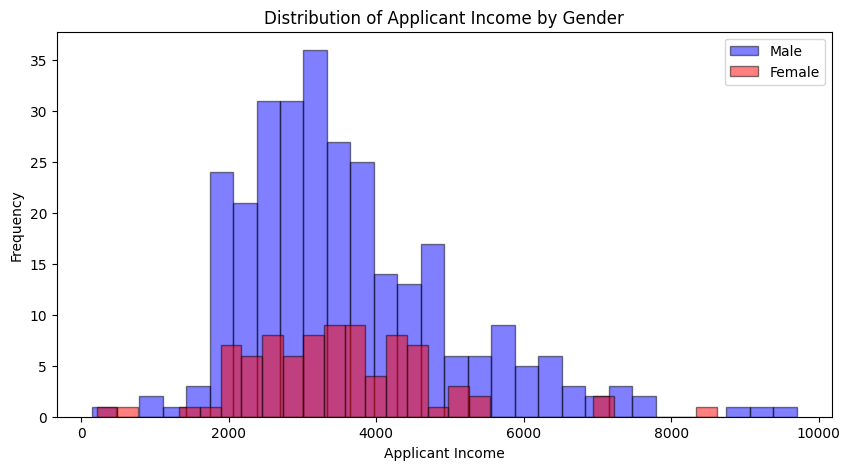

T-Statistic: 0.7239
P-Value: 0.4703


In [70]:
male_income = loans[loans["Gender"] == "Male"]["ApplicantIncome"].dropna()
female_income = loans[loans["Gender"] == "Female"]["ApplicantIncome"].dropna()

t_stat, p_value = stats.ttest_ind(male_income, female_income, equal_var=False)  # Welch's t-test

plt.figure(figsize=(10, 5))
plt.hist(male_income, bins=30, alpha=0.5, label="Male", color="blue", edgecolor="black")
plt.hist(female_income, bins=30, alpha=0.5, label="Female", color="red", edgecolor="black")
plt.legend()
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.title("Distribution of Applicant Income by Gender")
plt.show()

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

#Fail to reject the null hypothesis: No significant difference in mean income between males and females.

## Task 6. Comparing Loan Amount by Education Level


**Objective:** Determine if there is a significant difference in the mean loan amount requested by graduates and undergraduates.


**Null Hypothesis (H₀):** There is no significant difference in the mean LoanAmount between Graduates and Undergraduates.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean LoanAmount between Graduates and Undergraduates.

**Attribute to Use:** LoanAmount (continuous) and Education (categorical with two levels: Graduate and Undergraduate).



In [63]:
graduate_loans = loans[loans["Education"] == "Graduate"]["LoanAmount"].dropna()
undergraduate_loans = loans[loans["Education"] == "Not Graduate"]["LoanAmount"].dropna()

t_stat, p_value = stats.ttest_ind(graduate_loans, undergraduate_loans, equal_var=False)  # Welch’s t-test

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

#Fail to reject the null hypothesis: No significant difference in mean LoanAmount between Graduates and Undergraduates.

T-Statistic: 0.2414
P-Value: 0.8095


## Task 7: Comparing Coapplicant Income by Loan Status
Task Description:

**Objective:** Determine if there is a significant difference in the mean coapplicant income between applicants who were approved for a loan and those who were not.

**Null Hypothesis (H₀):** There is no significant difference in the mean CoapplicantIncome between applicants who were approved for a loan and those who were not.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean CoapplicantIncome between applicants who were approved for a loan and those who were not.

**Attribute to Use:** CoapplicantIncome (continuous) and Loan_Status (categorical with two levels: Y and N).



In [66]:
loans["CoapplicantIncome"] = pd.to_numeric(loans["CoapplicantIncome"], errors="coerce")
loans = loans.dropna(subset=["CoapplicantIncome", "Loan_Status"])

approved = loans[loans["Loan_Status"] == "Y"]["CoapplicantIncome"]
not_approved = loans[loans["Loan_Status"] == "N"]["CoapplicantIncome"]

print(f"Approved Mean Coapplicant Income: {approved.mean():.2f}")
print(f"Not Approved Mean Coapplicant Income: {not_approved.mean():.2f}")

t_stat, p_value = stats.ttest_ind(approved, not_approved, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Fail to reject the null hypothesis: No significant difference in mean CoapplicantIncome between loan-approved and non-approved applicants.

Approved Mean Coapplicant Income: 1290.70
Not Approved Mean Coapplicant Income: 1244.19
T-Statistic: 0.1360
P-Value: 0.8921


# Task 8: Comparing Loan Amount by Property Area

**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants living in urban and rural areas.


**Null Hypothesis (H₀):** There is no significant difference in the mean LoanAmount between applicants living in Urban and Rural areas.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean LoanAmount between applicants living in Urban and Rural areas.

**Attribute to Use:** LoanAmount (continuous) and Property_Area (categorical with two levels: Urban and Rural).

In [69]:
loans["LoanAmount"] = pd.to_numeric(loans["LoanAmount"], errors="coerce")
loans = loans.dropna(subset=["LoanAmount", "Property_Area"])

urban = loans[loans["Property_Area"] == "Urban"]["LoanAmount"]
rural = loans[loans["Property_Area"] == "Rural"]["LoanAmount"]

print(f"Urban Mean Loan Amount: {urban.mean():.2f}")
print(f"Rural Mean Loan Amount: {rural.mean():.2f}")

t_stat, p_value = stats.ttest_ind(urban, rural, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Reject the null hypothesis: There is a significant difference in mean LoanAmount between applicants in Urban and Rural areas.

Urban Mean Loan Amount: 98.40
Rural Mean Loan Amount: 110.26
T-Statistic: -3.2021
P-Value: 0.0016


## Task 9: Comparing Applicant Income by Self-Employment Status


**Objective:** Determine if there is a significant difference in the mean income of self-employed and non-self-employed applicants.

Write down the Hypothesis for this task.

**Attribute to Use:** ApplicantIncome (continuous) and Self_Employed (categorical with two levels: Yes and No).



In [85]:
self_employed = loans[loans["Self_Employed"] == "Yes"]["ApplicantIncome"].dropna()
non_self_employed = loans[loans["Self_Employed"] == "No"]["ApplicantIncome"].dropna()

n1, n2 = len(self_employed), len(non_self_employed)

mean1, mean2 = np.mean(self_employed), np.mean(non_self_employed)
std1, std2 = np.std(self_employed, ddof=1), np.std(non_self_employed, ddof=1)

t_stat, p_value = stats.ttest_ind(self_employed, non_self_employed, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Reject the null hypothesis: There is a significant difference in ApplicantIncome between self-employed and non-self-employed applicants.

T-Statistic: 3.4956
P-Value: 0.0012


## Task 10:  Comparing Loan Amount by Credit History

**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants with a credit history that meets guidelines and those who do not.

**Attribute to Use:** LoanAmount (continuous) and Credit_History (categorical with two levels: 1 (meets guidelines) and 0 (does not meet guidelines)).

In [77]:
 pd

# Assuming 'df' is your DataFrame containing the data
meets_guidelines = loans[loans["Credit_History"] == 1]["LoanAmount"].dropna()
does_not_meet_guidelines = loans[loans["Credit_History"] == 0]["LoanAmount"].dropna()

# Check sample sizes
n1, n2 = len(meets_guidelines), len(does_not_meet_guidelines)

# Compute means and standard deviations
mean1, mean2 = np.mean(meets_guidelines), np.mean(does_not_meet_guidelines)
std1, std2 = np.std(meets_guidelines, ddof=1), np.std(does_not_meet_guidelines, ddof=1)

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(meets_guidelines, does_not_meet_guidelines, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Fail to reject the null hypothesis: There is no significant difference in LoanAmount between applicants who meet credit history guidelines and those who do not.

T-Statistic: -1.0320
P-Value: 0.3047
Fail to reject the null hypothesis: There is no significant difference in LoanAmount between applicants who meet credit history guidelines and those who do not.


## Task 11: Comparing Loan Amount by Marital Status


**Objective:** Determine if there is a significant difference in the mean loan amount requested by married and unmarried applicants.

**Attribute to Use:** LoanAmount (continuous) and Married (categorical with two levels: Yes and No).

In [84]:
married = loans[loans["Married"] == "Yes"]["LoanAmount"].dropna()
unmarried = loans[loans["Married"] == "No"]["LoanAmount"].dropna()

n1, n2 = len(married), len(unmarried)

mean1, mean2 = np.mean(married), np.mean(unmarried)
std1, std2 = np.std(married, ddof=1), np.std(unmarried, ddof=1)

t_stat, p_value = stats.ttest_ind(married, unmarried, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Reject the null hypothesis: There is a significant difference in LoanAmount between married and unmarried applicants.

T-Statistic: 2.7524
P-Value: 0.0063


## Task 12: Comparing Applicant Income by Loan Status

**Objective:** Determine if there is a significant difference in the mean income of applicants who were approved for a loan and those who were not.

**Attribute to Use:** ApplicantIncome (continuous) and Loan_Status (categorical with two levels: Y and N).

# Task 12.1: Calculate a 95% Confidence Interval of Income of those applicants who are approved for a loan.



In [87]:
approved_loans = loans[loans["Loan_Status"] == "Y"]["ApplicantIncome"].dropna()

sample_mean = np.mean(approved_loans)
sample_std = np.std(approved_loans, ddof=1)
n = len(approved_loans)

standard_error = sample_std / np.sqrt(n)

t_critical = stats.t.ppf(1 - 0.05 / 2, df=n-1)

margin_of_error = t_critical * standard_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for the mean income of approved loan applicants: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for the mean income of approved loan applicants: (3398.38, 3742.94)


# Task 13: Comparing Loan Amount by Dependents

**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants with 0 dependents and those with 1 or more dependents.



In [90]:
loan_amount_dependents_0 = loans[loans["Dependents"] == "0"]["LoanAmount"].dropna()
loan_amount_dependents_1_or_more = loans[loans["Dependents"].isin(["1", "2", "3+"])]["LoanAmount"].dropna()

t_stat, p_val = stats.ttest_ind(loan_amount_dependents_0, loan_amount_dependents_1_or_more)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -1.4506190656983555
P-value: 0.14773089166818548


## Task 14: Comparing Loan Amount by Loan Amount Term


**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants with a loan term of 12 months and those with a loan term of 36 months.

In [98]:
loan_amount_term_12 = loans[loans["Loan_Amount_Term"] == 12]["LoanAmount"].dropna()
loan_amount_term_36 = loans[loans["Loan_Amount_Term"] == 36]["LoanAmount"].dropna()

t_stat, p_val = stats.ttest_ind(loan_amount_term_12, loan_amount_term_36)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

#Determine NAN is occuring–only 1 applicatant w/ either one
print(f"Number of applicants with term 12: {len(loan_amount_term_12)}")
print(f"Number of applicants with term 36: {len(loan_amount_term_36)}")

print(f"Loan Amount Term 12 Unique Values: {loan_amount_term_12.unique()}")
print(f"Loan Amount Term 36 Unique Values: {loan_amount_term_36.unique()}")


T-statistic: nan
P-value: nan
Number of applicants with term 12: 1
Number of applicants with term 36: 1
Loan Amount Term 12 Unique Values: [111.]
Loan Amount Term 36 Unique Values: [80.]
